In [1]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
import mTSP
import imp
imp.reload(mTSP)

<module 'mTSP' from '/Users/rspeare/Code/python/kaggle/santa/src/mTSP.py'>

In [7]:
m=mTSP.mission(10)
m.read_submission('../data/local_search_owl_70_1.2523.csv')

getting ready to index trips
indexing now...


In [8]:
m.loss()

12513970480.493231

In [9]:
print('number of trips ',len(m.trips))

number of trips  1483


12513970480.5


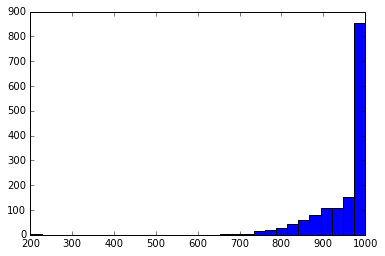

In [10]:
m.check_tmap()
lds=m.check_loads()
print(m.loss())
plt.hist(lds,30)
plt.show()

In [11]:
lengths=np.array([len(t) for t in m.trips])
np.sort(lengths)

array([16, 48, 49, ..., 70, 71, 71])

37.5612853904 0.0926215421734


/Users/rspeare/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


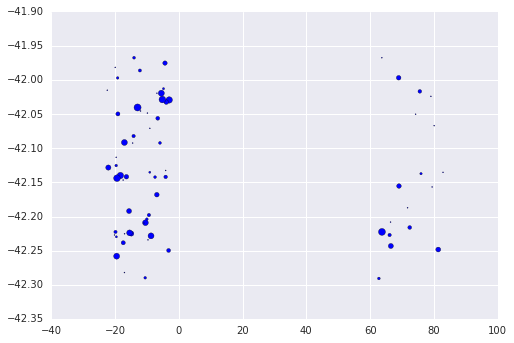

In [12]:
import seaborn as sns
pos=np.array([m.dmap[g] for g in m.trips[310]])
w=np.array([m.wmap[g] for g in m.trips[3]])
plt.scatter(pos[:,0],pos[:,1],s=w*1)
varx=np.std(pos[:,0])
vary=np.std(pos[:,1])
print(varx,vary)
plt.show()

In [14]:
m.check_tmap()
fname='../data/local_search_owl_70_1.2523_v2.csv'

In [16]:
m.bur

In [ ]:
import numpy as np
t=10**2
m0=10**4
i=0
while(True):
    i+=1
    var=m.burn_Kswap(3,m0,t,m.gifts)
    m.burn_merge(10*m0,t)
    m.burn_split(m0,t)
    m.reorder_all_trips()
    m.check_tmap()
    m.check_loads()
    print('score : '+str(m.loss())+' temp: '+str(t)+' var '+str(var))
    if (var < 3.0):
        t*=0.99
    if (i %10 ==0):
        print('writing to file...')
        m.write_submission(fname)
        m.read_submission(fname)
        print('number of trips ',len(m.trips))

# Greedy start point through kmeans

In [ ]:
m.check_tmap()
lds=m.check_loads()
m.write_submission('../data/2002.csv')

In [ ]:
X=giftsDF[['Latitude','Longitude']].values

In [ ]:
est=KMeans(3000)

In [ ]:
est.n_clusters

In [ ]:
est.fit(X)

In [ ]:
y=est.predict(X)

In [ ]:
sampleDF.TripId=y

In [ ]:
giftsDF.head()

In [ ]:
XX=np.vstack([giftsDF.GiftId,y,giftsDF.Weight]).T

In [ ]:
XX

In [ ]:
est.score(X)

In [ ]:
import mTSP

In [ ]:
m=mTSP.mission(1)

In [ ]:
sampleDF.to_csv('kmeans_sub.csv')

In [ ]:
m.read_submission('kmeans_sub.csv')

In [ ]:
loads=[]
for i in np.arange(len(m.trips)):
    load=sum([m.wmap[g] for g in m.trips[i]])
    loads.append(load)
plt.hist(loads)
plt.show()

In [ ]:
bads=[]
index=3
while (True):
    try:
        m.check_trip_load(m.trips[bad_trips[index]],bad_trips[index])
    except:
        bads.append(m.trips[bad_trips[index]].pop())
        m.reindex_trip(bad_trips[index])
    if (sum([m.wmap[g] for g in m.trips[bad_trips[index]]]) > 990.):
        break

In [ ]:
bads=[]
try:
    m.check_trip_load(m.trips[bad_trips[0]],bad_trips[0])
except:
    bads.append(m.trips[bad_trips[0]].pop())
    m.reindex_trip(0)
#    m.trips.append([top])

In [ ]:
[[g,m.wmap[g]] for g in m.trips[bad_trips[0]]]